In [1]:
import pandas as pd

train=pd.read_csv("../input/train.csv")
test=pd.read_csv("../input/test.csv")
sub=pd.read_csv("../input/sample_submission.csv")
dipole=pd.read_csv("../input/dipole_moments.csv")
magnetic_shield=pd.read_csv("../input/magnetic_shielding_tensors.csv")
scalar_coupling=pd.read_csv("../input/scalar_coupling_contributions.csv")
mulliken=pd.read_csv("../input/mulliken_charges.csv")
potential_energy=pd.read_csv("../input/potential_energy.csv")
structure=pd.read_csv("../input/structures.csv")


In [12]:
train.head(10)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074
5,5,dsgdb9nsd_000001,2,3,2JHH,-11.2541
6,6,dsgdb9nsd_000001,2,4,2JHH,-11.2548
7,7,dsgdb9nsd_000001,3,0,1JHC,84.8093
8,8,dsgdb9nsd_000001,3,4,2JHH,-11.2543
9,9,dsgdb9nsd_000001,4,0,1JHC,84.8095


In [13]:
test.head(10)

,id,molecule_name,atom_index_0,atom_index_1,type
0,4658147,dsgdb9nsd_000004,2,0,2JHC
1,4658148,dsgdb9nsd_000004,2,1,1JHC
2,4658149,dsgdb9nsd_000004,2,3,3JHH
3,4658150,dsgdb9nsd_000004,3,0,1JHC
4,4658151,dsgdb9nsd_000004,3,1,2JHC
5,4658152,dsgdb9nsd_000015,3,0,1JHC
6,4658153,dsgdb9nsd_000015,3,2,3JHC
7,4658154,dsgdb9nsd_000015,3,4,2JHH
8,4658155,dsgdb9nsd_000015,3,5,2JHH
9,4658156,dsgdb9nsd_000015,4,0,1JHC


In [14]:
train.describe()

,id,atom_index_0,atom_index_1,scalar_coupling_constant
count,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06
mean,2.329073e+06,1.335689e+01,5.883966e+00,1.592165e+01
std,1.344691e+06,3.267712e+00,4.993943e+00,3.494198e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-3.621860e+01
25%,1.164536e+06,1.100000e+01,2.000000e+00,-2.549780e-01
50%,2.329073e+06,1.300000e+01,5.000000e+00,2.281130e+00
75%,3.493610e+06,1.600000e+01,8.000000e+00,7.390655e+00
max,4.658146e+06,2.800000e+01,2.800000e+01,2.048800e+02


In [16]:
train.isnull().sum()

id                          0
molecule_name               0
atom_index_0                0
atom_index_1                0
type                        0
scalar_coupling_constant    0
dtype: int64

In [17]:
test.isnull().sum()

id               0
molecule_name    0
atom_index_0     0
atom_index_1     0
type             0
dtype: int64

In [2]:
#train=train.drop("id",axis=1)
test_id=test["id"]
test=test.drop("id",axis=1)

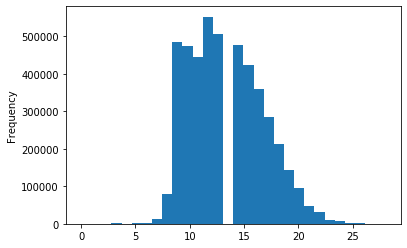

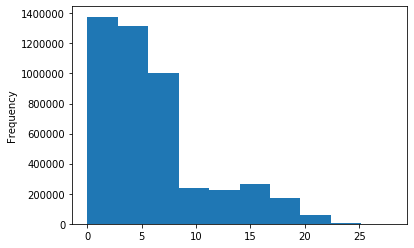

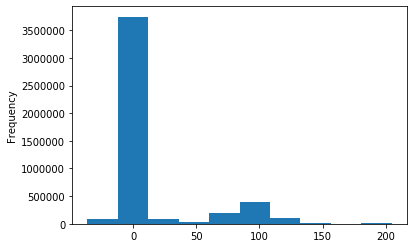

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
train.columns
train['atom_index_0'].plot.hist(bins=30)
fig=plt.figure()
train['atom_index_1'].plot.hist()
fig=plt.figure()
train['scalar_coupling_constant'].plot.hist()

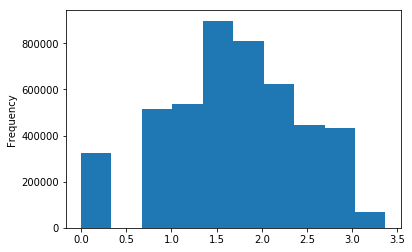

In [36]:
import numpy as np
np.log1p(train["atom_index_1"]).plot.hist()

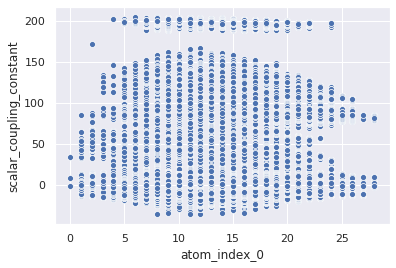

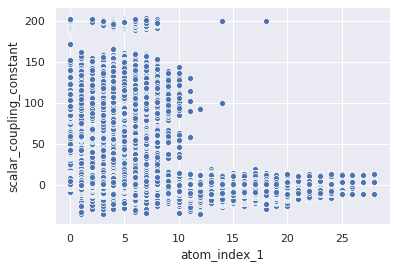

In [4]:
import seaborn as sns
sns.set()
sns.scatterplot(x='atom_index_0',y='scalar_coupling_constant',data=train)
fig=plt.figure()
sns.set()
sns.scatterplot(x='atom_index_1',y='scalar_coupling_constant',data=train)

In [5]:
y_train=train["scalar_coupling_constant"]

In [6]:
train.drop("scalar_coupling_constant",axis=1,inplace=True)

In [7]:
len(train["molecule_name"].unique())

85003

In [8]:
structure.head(10)

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397
5,dsgdb9nsd_000002,0,N,-0.040426,1.024108,0.062564
6,dsgdb9nsd_000002,1,H,0.017257,0.012545,-0.027377
7,dsgdb9nsd_000002,2,H,0.915789,1.358745,-0.028758
8,dsgdb9nsd_000002,3,H,-0.520278,1.343532,-0.775543
9,dsgdb9nsd_000003,0,O,-0.034360,0.977540,0.007602
